# 1- Importantion des librairies necessaires au travail

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Lecture des fichiers d'amplitude et coordonnées

In [8]:
outfile1 = 'lines1.npy'
outfile2 = 'Cols1.npy'
outfile3 = 'amplitude1.npy'
lines=np.load(outfile1)
cols=np.load(outfile2)
amplitude=np.load(outfile3)

In [8]:
np.average(amplitude)

0.7568809137254904

In [9]:
amplitude.shape

(1000, 1000)

In [19]:
lines[0:10]

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])

In [20]:
cols[0:10]

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])

In [30]:
constructed_img = np.zeros(amplitude.shape)
for line in lines:
    x = int(line*1000)
    for col in cols:
        y=int(col*1000)
        constructed_img[x,y] = amplitude[x,y]
        



In [31]:
np_image = np.asarray(constructed_img,dtype='uint16')

C:\Users\Dell\AppData\Local\Temp/ipykernel_8844/1076976610.py:2: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(cmap='gray')


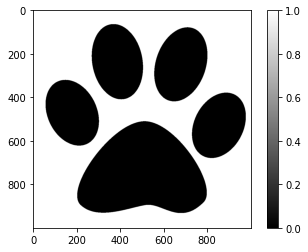

In [32]:
plt.imshow(np_image,cmap='gray')
plt.colorbar(cmap='gray')

# Echantillonage

In [33]:
# utiliser un saut pour l'échantillonage
step=5

width = lines.shape[0]
height = cols.shape[0]

# réaliser l'échantillonage
x=0# cordonnes x real de la sortie
y=0# cordonnes y real de la sortie
img_width = int(amplitude.shape[0]/step)
img_height = int(amplitude.shape[1]/step)

img = np.zeros((img_width,img_height)) #nouvelle taille de l'image du sortie

for i in range(0,width,step):
    x=0 # remise a zero de x chaque parcours de y
    line = int(lines[i] * 1000 ) #conversion en entier
    for j in range(0,height,step):
        col = int(cols[j] * 1000 )#conversion en entier
        img[y,x] =  int(amplitude[line,col])
        x+=1
    y+=1

ca reste une image binaire (0 ou 1)

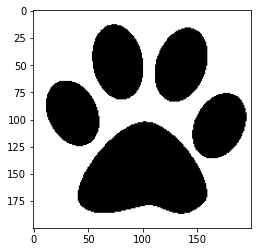

In [29]:
plt.imshow(img,cmap='gray')

# Quantification

In [9]:
nBits=4
# calculer le nombre de niveaux de gris
L= pow(2,nBits)
#réaliser la quantification 

# en gardant l'echantillonage

step=5

width = lines.shape[0]
height = cols.shape[0]
x=0# cordonnes x real de la sortie
y=0# cordonnes y real de la sortie
img_width = int(amplitude.shape[0]/step)
img_height = int(amplitude.shape[1]/step)
img = np.zeros((img_width,img_height)) #nouvelle taille de l'image du sortie

for i in range(0,width,step):
    x=0 # remise a zero de x chaque parcours de y
    line = int(lines[i] * 1000 ) #conversion en entier
    for j in range(0,height,step):
        col = int(cols[j] * 1000 )#conversion en entier
        img[y,x] =  (L-1)*amplitude[line,col]  # L-1  par exemple L = 16, donc les valeurs € [0,15]
        x+=1
    y+=1

#conversion en entier
resultat = np.asarray(img,dtype='uint8')#unit8 est le minimum

# Afficher l'image résultante

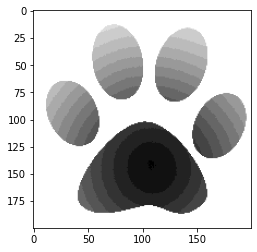

In [10]:
plt.imshow(resultat,cmap='gray')

# Sauvegarder l'image résultante

In [38]:
plt.imsave("résultat.png", resultat, cmap='gray')

# Lecture et affichage d'une autre image 


In [4]:
# lecture de l'image en niveau de gris
image = cv2.imread('toAdd.bmp',0)

In [6]:
# afficher avec opencv
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Réaliser les operations sur l'image

Addition des deux images

In [14]:
# additionner image et resultat
add = cv2.resize(image,[resultat.shape[0],resultat.shape[1]] )+ resultat
# si les deux images ne sont pas de même taille, 
# il faudra les redimensionner
# analyser les paramètres de redimensionnement

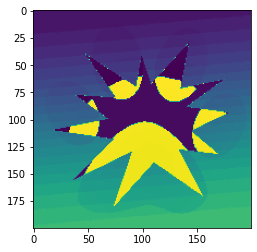

In [15]:
plt.imshow(add)

Negatif de l'image

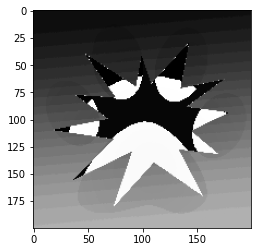

In [16]:
# soustraire de 255 de chaque pixel 
imageN = np.asarray( (add /((L-1)+255)) * 255, dtype = 'uint8')
# afficher l'image résultante
plt.imshow(imageN,cmap='gray')